In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

<h1>Read and Analyse data</h1>

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
print(f"train dataset shape: {train.shape}")
print(f"test dataset shape: {test.shape}")

train dataset shape: (44638, 29)
test dataset shape: (23525, 28)


In [4]:
train.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,Resort Hotel,0,3,2016,February,7,12,0,2,2,...,E,F,0,No Deposit,0,Transient,81.0,1,0,2016-02-14
1,City Hotel,1,50,2016,November,47,18,1,2,2,...,A,A,0,No Deposit,0,Transient,93.6,0,2,2016-10-09
2,City Hotel,0,14,2015,September,37,7,1,5,2,...,F,F,0,No Deposit,0,Contract,166.0,0,3,2015-09-13
3,City Hotel,0,18,2015,December,50,6,2,0,2,...,A,A,0,No Deposit,0,Transient,107.0,0,0,2015-12-08
4,City Hotel,1,263,2016,September,40,29,2,4,2,...,A,A,0,No Deposit,0,Transient,100.3,0,0,2016-01-18


In [5]:
test.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,City Hotel,73,2016,July,28,6,0,2,1,0.0,...,A,A,0,No Deposit,0,Transient,107.10,0,0,2016-06-12
1,City Hotel,37,2015,October,43,24,2,5,1,1.0,...,A,A,0,No Deposit,0,Transient,87.78,0,0,2015-10-31
2,City Hotel,190,2017,April,14,6,2,3,2,0.0,...,A,A,0,No Deposit,0,Transient,88.40,0,0,2016-09-29
3,City Hotel,287,2016,August,35,24,1,4,2,0.0,...,B,B,1,No Deposit,0,Transient,76.71,0,0,2016-08-29
4,Resort Hotel,386,2016,October,43,20,1,3,2,0.0,...,A,A,0,No Deposit,0,Transient-Party,49.00,0,0,2016-09-14


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44638 entries, 0 to 44637
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           44638 non-null  object 
 1   is_canceled                     44638 non-null  int64  
 2   lead_time                       44638 non-null  int64  
 3   arrival_date_year               44638 non-null  int64  
 4   arrival_date_month              44638 non-null  object 
 5   arrival_date_week_number        44638 non-null  int64  
 6   arrival_date_day_of_month       44638 non-null  int64  
 7   stays_in_weekend_nights         44638 non-null  int64  
 8   stays_in_week_nights            44638 non-null  int64  
 9   adults                          44638 non-null  int64  
 10  children                        44638 non-null  float64
 11  babies                          44638 non-null  int64  
 12  meal                            

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23525 entries, 0 to 23524
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           23525 non-null  object 
 1   lead_time                       23525 non-null  int64  
 2   arrival_date_year               23525 non-null  int64  
 3   arrival_date_month              23525 non-null  object 
 4   arrival_date_week_number        23525 non-null  int64  
 5   arrival_date_day_of_month       23525 non-null  int64  
 6   stays_in_weekend_nights         23525 non-null  int64  
 7   stays_in_week_nights            23525 non-null  int64  
 8   adults                          23525 non-null  int64  
 9   children                        23525 non-null  float64
 10  babies                          23525 non-null  int64  
 11  meal                            23525 non-null  object 
 12  country                         

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


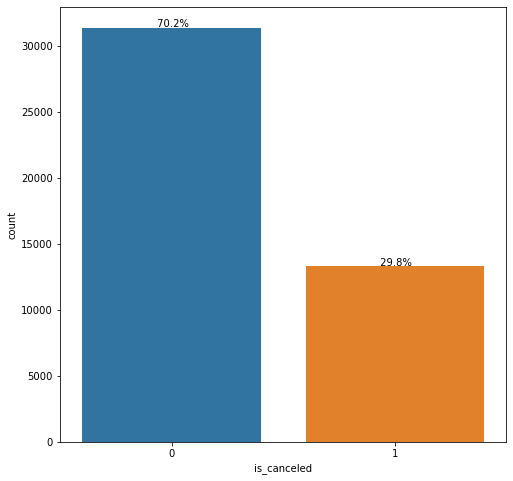

In [8]:
# distribution of the target feature 'is_canceled'
plt.figure(figsize=(8, 8))
ax = sns.countplot(train['is_canceled'])

for patch in ax.patches:
    ax.text(x = patch.get_x() + patch.get_width()/2,
            y = patch.get_height() + len(train)*0.001,
            s = f'{(patch.get_height()/len(train))*100: 1.1f}%',
            ha = 'center'
           )

plt.show()

<h1>Feature analysis</h1>

<h2>Numeric feature</h2>

In [9]:
numeric = []

for col in train.columns:
    if col == 'is_canceled':
        continue
    elif train[col].dtype == int or train[col].dtype == float:
        numeric.append(col)

datetime = ['arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month']

for col in datetime:
    numeric.remove(col)
    
numeric

['lead_time',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [10]:
continous = ['adr']

discrete = ['lead_time', 
            'stays_in_weekend_nights', 
            'stays_in_week_nights', 
            'adults', 
            'children', 
            'babies', 
            'is_repeated_guest', 
            'previous_cancellations', 
            'previous_bookings_not_canceled', 
            'booking_changes', 
            'days_in_waiting_list', 
            'required_car_parking_spaces',
            'total_of_special_requests']

<h3>Continous data</h3>

In [11]:
x, y = train[continous], train['is_canceled']
x.describe()

,adr
count,44638.000000
mean,101.624687
std,48.429930
min,0.000000
25%,69.380000
50%,94.500000
75%,126.000000
max,510.000000


In [12]:
# standardization
x = (x - x.mean()) / x.std()
x

,adr
0,-0.425867
1,-0.165697
2,1.329246
3,0.110992
4,-0.027353
...,...
44633,0.358772
44634,-0.160328
44635,-0.054196
44636,-0.257789


(array([0]), [Text(0, 0, 'adr')])

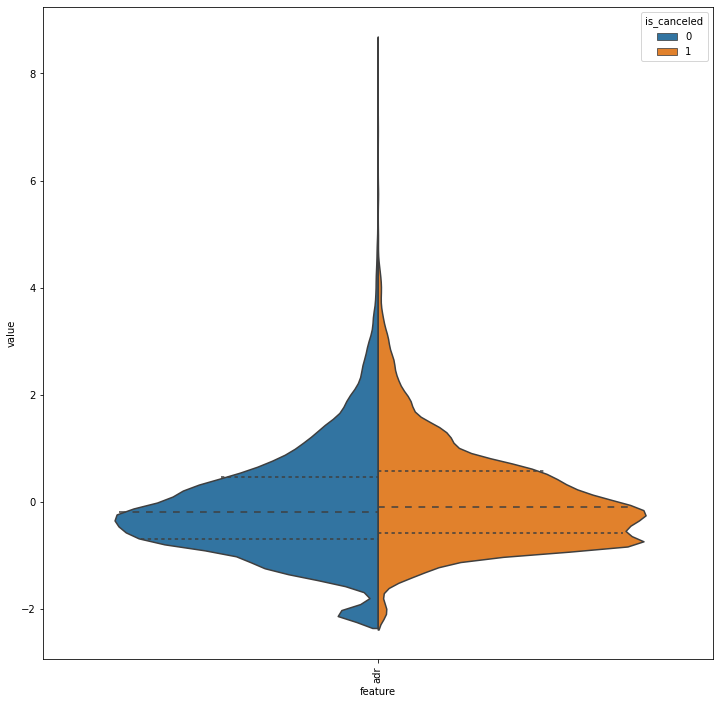

In [13]:
# adr
data = pd.concat([y, x], axis=1)
data = pd.melt(data, id_vars='is_canceled', var_name='feature', value_name='value')

plt.figure(figsize=(12, 12))
sns.violinplot(x='feature', y='value', hue='is_canceled', data=data, split=True, inner='quart')
plt.xticks(rotation=90)

<h3>Discrete data</h3>

In [14]:
x, y = train[discrete], train['is_canceled']
x.describe()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
count,44638.000000,44638.000000,44638.000000,44638.000000,44638.000000,44638.000000,44638.000000,44638.000000,44638.000000,44638.000000,44638.000000,44638.000000,44638.000000
mean,99.395291,0.931516,2.507303,1.852883,0.102424,0.008289,0.034052,0.069672,0.140799,0.238026,2.149133,0.067723,0.603253
std,104.485734,1.002021,1.928111,0.578898,0.393273,0.091649,0.181364,0.726281,1.540109,0.682989,17.134385,0.255077,0.803659
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,65.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,154.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,737.000000,16.000000,40.000000,55.000000,3.000000,2.000000,1.000000,26.000000,72.000000,21.000000,391.000000,8.000000,5.000000


In [15]:
# standardization
x = (x - x.mean()) / x.std()
x

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
0,-0.922569,-0.929637,-0.263109,0.254132,-0.260440,-0.090441,-0.187753,-0.095929,-0.091422,-0.348506,-0.125428,3.654886,-0.750633
1,-0.472747,0.068346,-0.263109,0.254132,-0.260440,-0.090441,-0.187753,-0.095929,-0.091422,-0.348506,-0.125428,-0.265499,1.737985
2,-0.817291,0.068346,1.292818,0.254132,4.825087,-0.090441,-0.187753,-0.095929,-0.091422,-0.348506,-0.125428,-0.265499,2.982293
3,-0.779009,1.066329,-1.300393,0.254132,-0.260440,-0.090441,-0.187753,-0.095929,-0.091422,-0.348506,-0.125428,-0.265499,-0.750633
4,1.565809,1.066329,0.774176,0.254132,-0.260440,-0.090441,-0.187753,-0.095929,-0.091422,-0.348506,-0.125428,-0.265499,-0.750633
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44633,-0.654590,-0.929637,-0.781751,-1.473287,-0.260440,-0.090441,-0.187753,-0.095929,-0.091422,-0.348506,-0.125428,-0.265499,1.737985
44634,0.158918,1.066329,1.292818,0.254132,-0.260440,-0.090441,-0.187753,-0.095929,-0.091422,-0.348506,-0.125428,-0.265499,-0.750633
44635,-0.099490,0.068346,-0.263109,0.254132,-0.260440,-0.090441,-0.187753,-0.095929,-0.091422,-0.348506,-0.125428,-0.265499,0.493676
44636,1.699799,1.066329,1.292818,0.254132,-0.260440,-0.090441,-0.187753,-0.095929,-0.091422,-0.348506,-0.125428,-0.265499,0.493676


(array([0, 1, 2, 3]),
 [Text(0, 0, 'lead_time'),
  Text(1, 0, 'stays_in_weekend_nights'),
  Text(2, 0, 'stays_in_week_nights'),
  Text(3, 0, 'adults')])

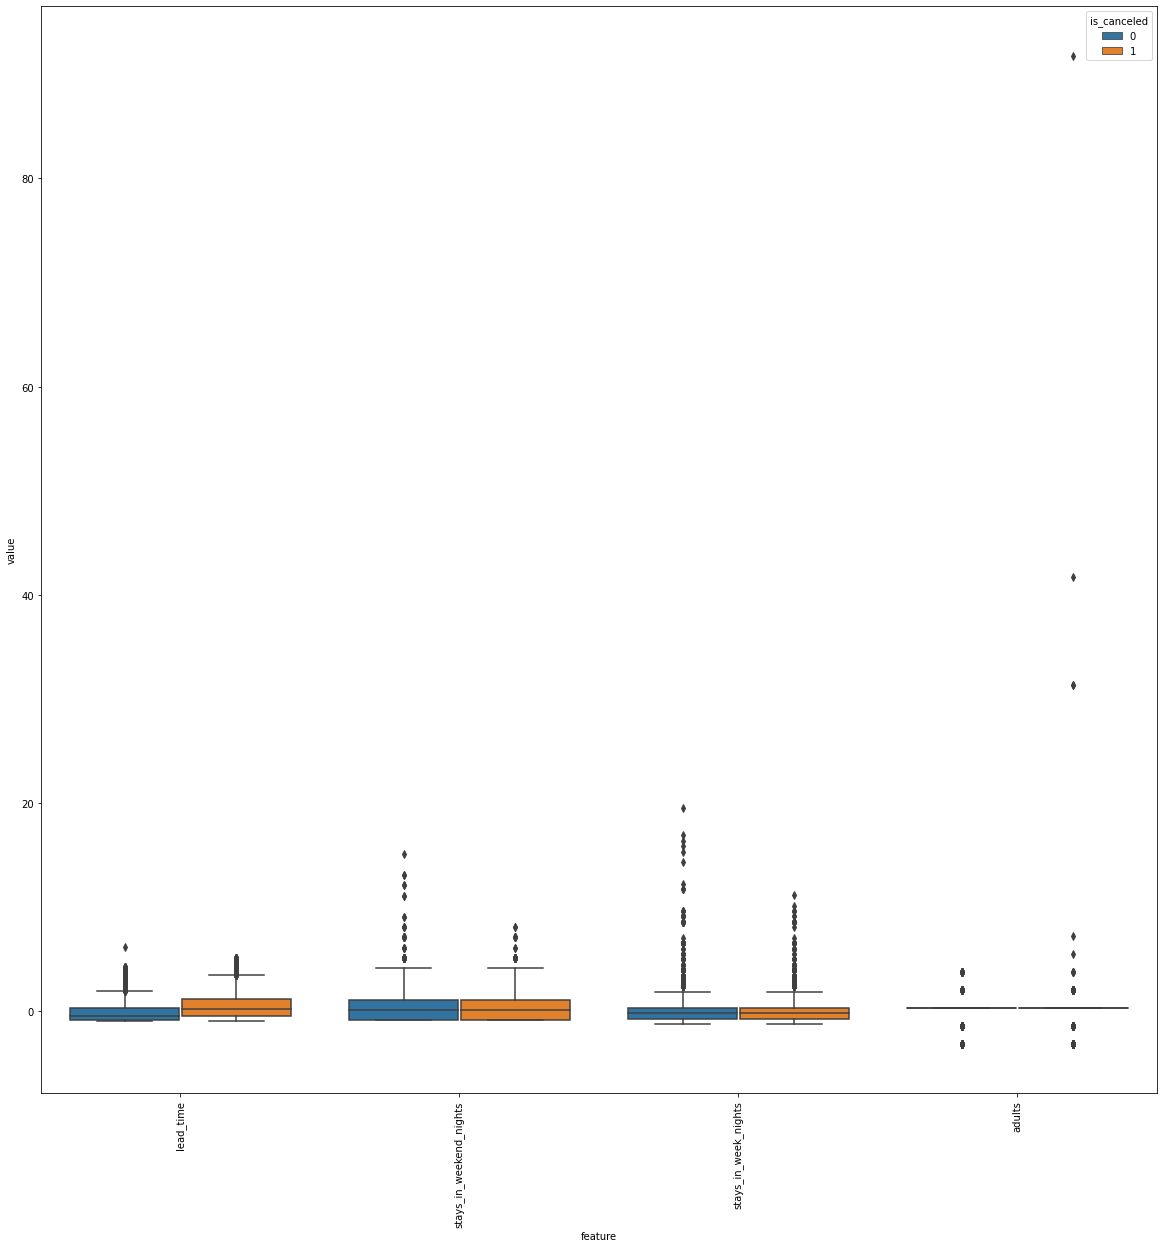

In [16]:
# lead_time, stays_in_weeked_nights, stays_in_week_nights, adults
data = pd.concat([y, x.iloc[:, :4]], axis=1)
data = pd.melt(data, id_vars='is_canceled', var_name='feature', value_name='value')

plt.figure(figsize=(20, 20))
sns.boxplot(x='feature', y='value', hue='is_canceled', data=data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'children'),
  Text(1, 0, 'babies'),
  Text(2, 0, 'is_repeated_guest'),
  Text(3, 0, 'previous_cancellations')])

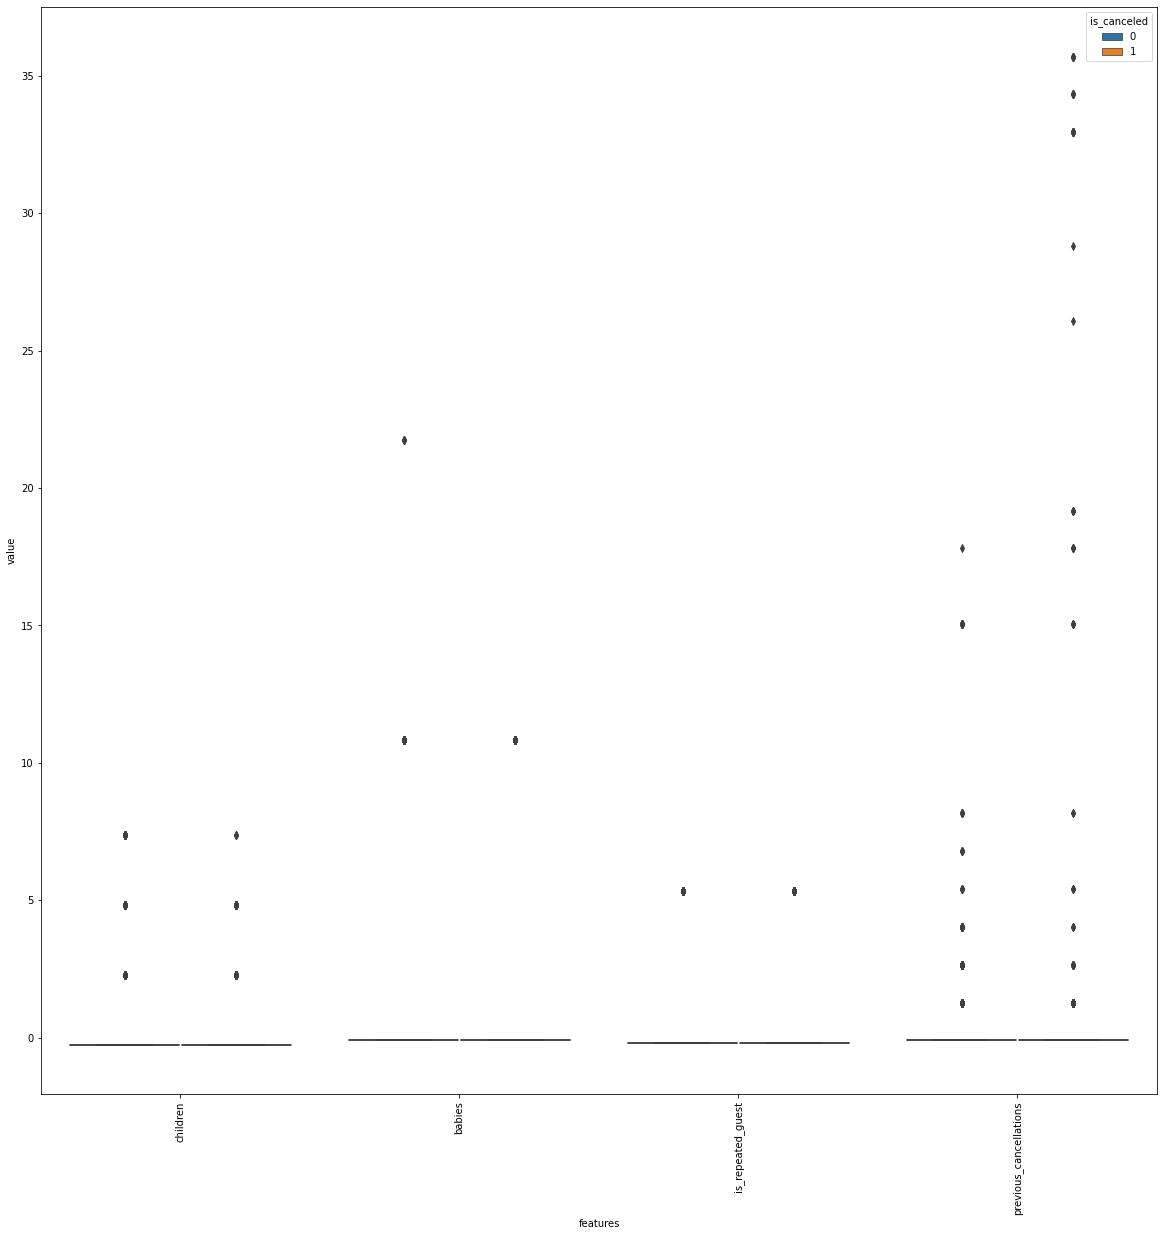

In [17]:
# children, babies, is_repeated_guest, previous_cancellations
data = pd.concat([y, x.iloc[:, 4:8]], axis=1)
data = pd.melt(data, id_vars='is_canceled', var_name='features', value_name='value')

plt.figure(figsize=(20, 20))
sns.boxplot(x='features', y='value', hue='is_canceled', data=data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'previous_bookings_not_canceled'),
  Text(1, 0, 'booking_changes'),
  Text(2, 0, 'days_in_waiting_list'),
  Text(3, 0, 'required_car_parking_spaces'),
  Text(4, 0, 'total_of_special_requests')])

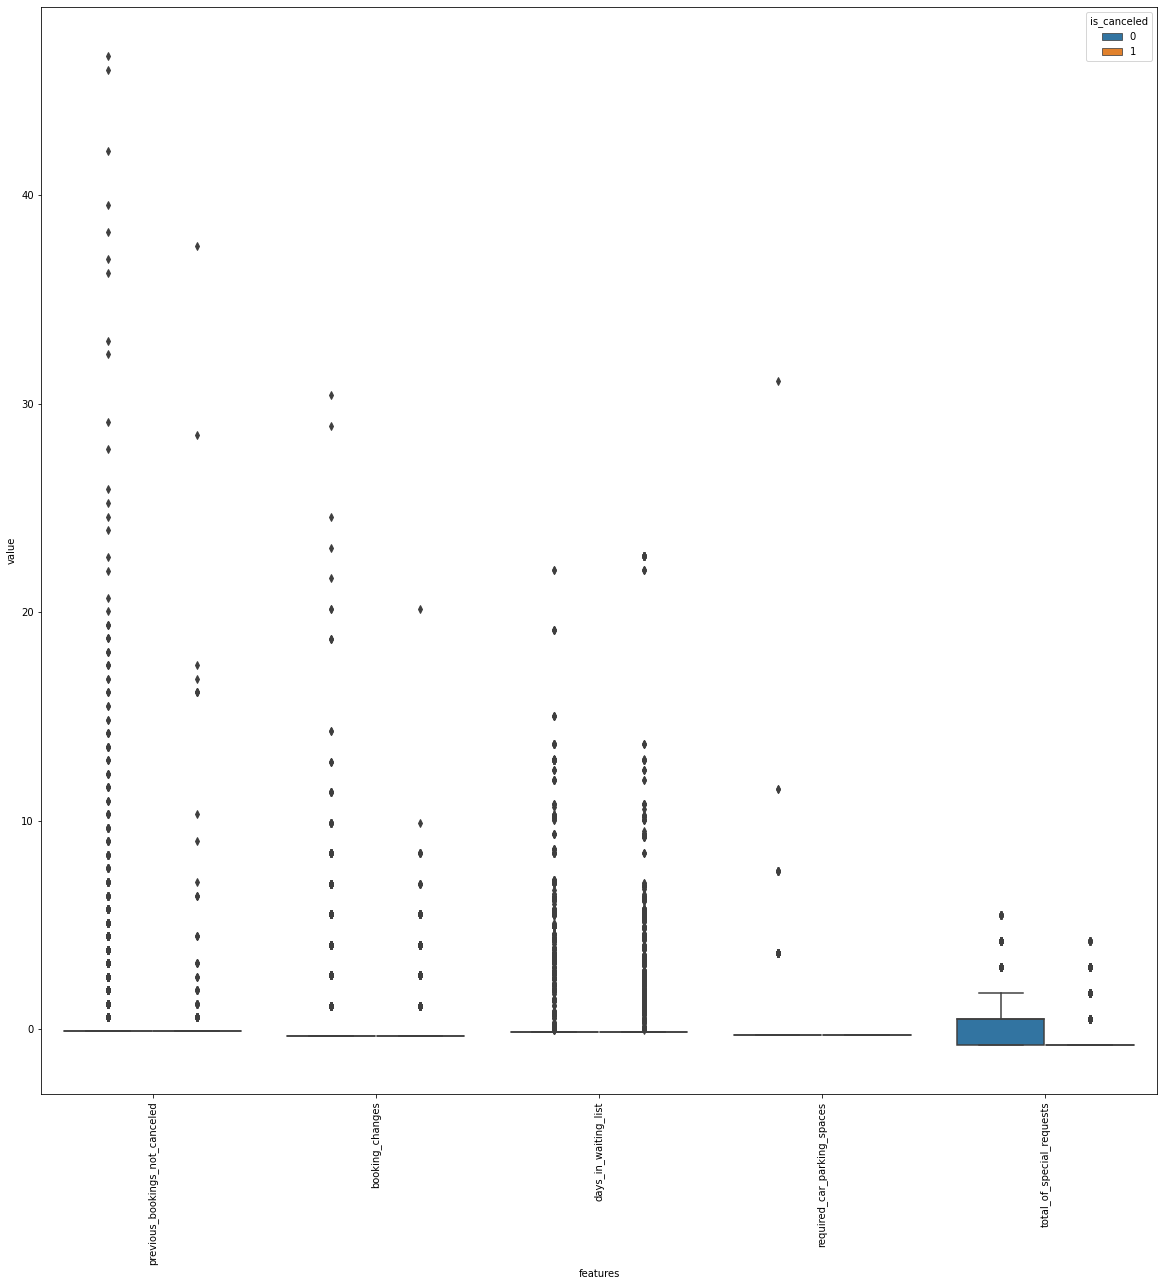

In [18]:
# previous_bookings_not_canceled, booking_changes, days_in_waiting_list, required_car_parking_spaces, total_of_special_requests
data = pd.concat([y, x.iloc[:, 8:]], axis=1)
data = pd.melt(data, id_vars='is_canceled', var_name='features', value_name='value')

plt.figure(figsize=(20, 20))
sns.boxplot(x='features', y='value', hue='is_canceled', data=data)
plt.xticks(rotation=90)

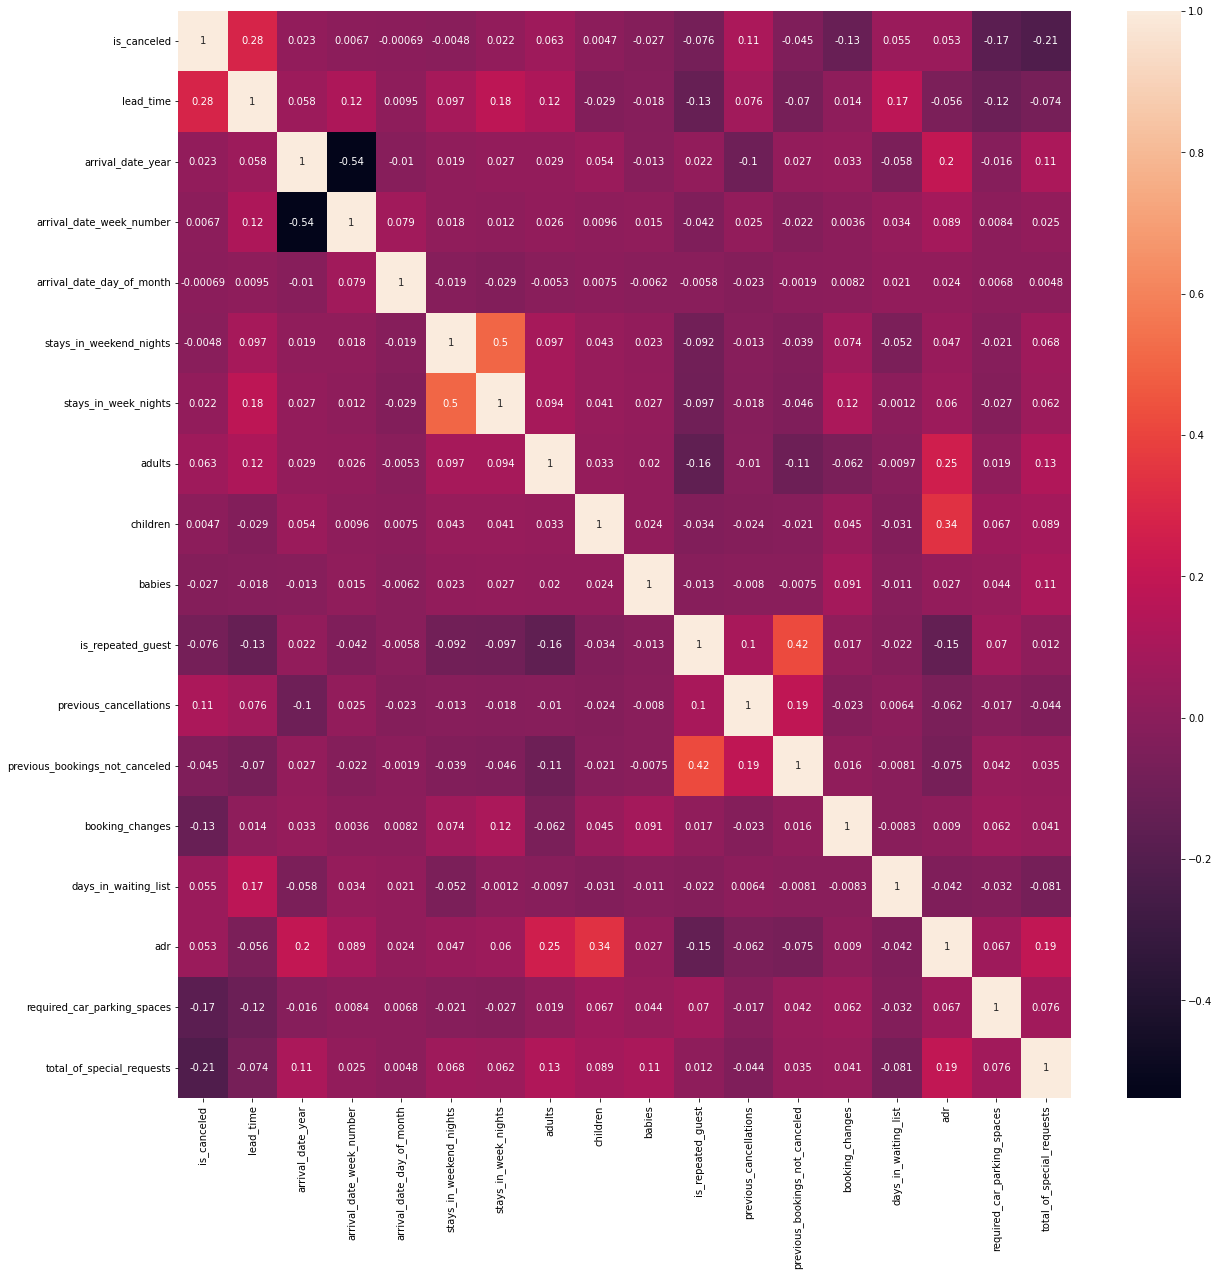

In [19]:
# plot correlation heatmap
correlation = train.corr()

plt.figure(figsize = (20, 20))
corr_heatmap = sns.heatmap(correlation, annot=True)

<h2>Categorical feature</h2>

In [20]:
categorical = []

for col in train.columns:
    if train[col].dtype == object:
        categorical.append(col)
        
categorical = ['arrival_date_year', 'arrival_date_month'] + categorical
categorical.remove('reservation_status_date')
        
categorical

['arrival_date_year',
 'arrival_date_month',
 'hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type']

<h3>Binary data</h3>

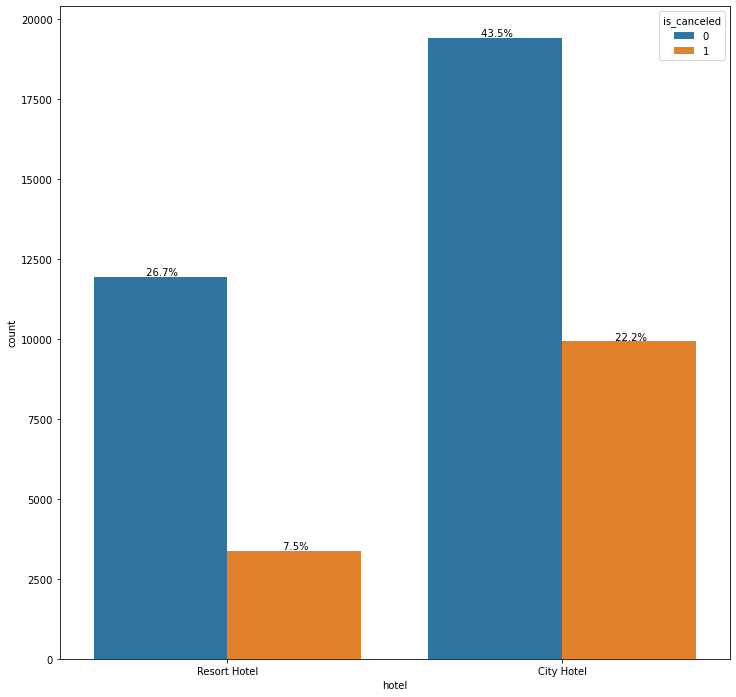

In [21]:
# hotel
plt.figure(figsize=(12, 12))
ax = sns.countplot(x='hotel', data=train, hue='is_canceled')

for patch in ax.patches:
    ax.text(x = patch.get_x() + patch.get_width()/2,
               y = patch.get_height() + len(train)*0.001,
               s = f'{(patch.get_height()/len(train))*100: 1.1f}%',
               ha = 'center')
    
plt.show()

<h3>Ordnial data</h3>

In [22]:
# deposit_type
x, y = train['deposit_type'], train['is_canceled']

crosstab = pd.crosstab(x, y, normalize='index') * 100
crosstab = crosstab.reset_index()
crosstab

is_canceled,deposit_type,0,1
0,No Deposit,77.676153,22.323847
1,Non Refund,1.014059,98.985941
2,Refundable,89.062500,10.937500


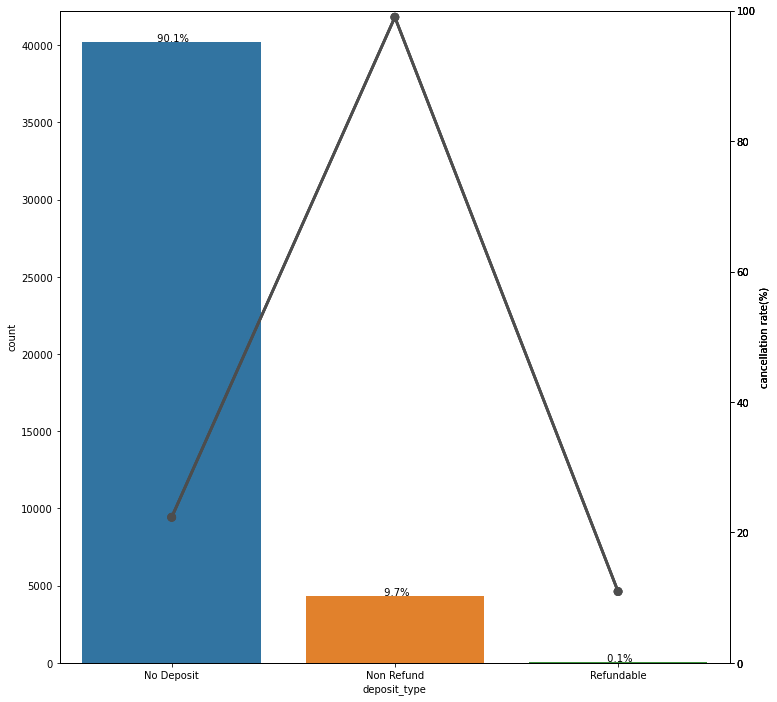

In [23]:
plt.figure(figsize=(12, 12))
ax = sns.countplot(x='deposit_type', data=train)

for patch in ax.patches:
    
    ax.text(x = patch.get_x() + patch.get_width()/2,
            y = patch.get_height() + len(train)*0.001,
            s = f'{(patch.get_height()/len(train))*100: 1.1f}%',
            ha = 'center')
    
    ax2 = ax.twinx()
    ax2 = sns.pointplot(x='deposit_type', y=1, data=crosstab, order=crosstab['deposit_type'].values, color='.3')
    ax2.set_ylabel('cancellation rate(%)')
    ax2.set_ylim(0, 100)

<h3>Nominal data</h3>

In [24]:
# arrival_date_year
x, y = train['arrival_date_year'], train['is_canceled']

crosstab = pd.crosstab(x, y, normalize='index') * 100
crosstab = crosstab.reset_index()
crosstab

is_canceled,arrival_date_year,0,1
0,2015,70.751473,29.248527
1,2016,71.404486,28.595514
2,2017,68.324417,31.675583


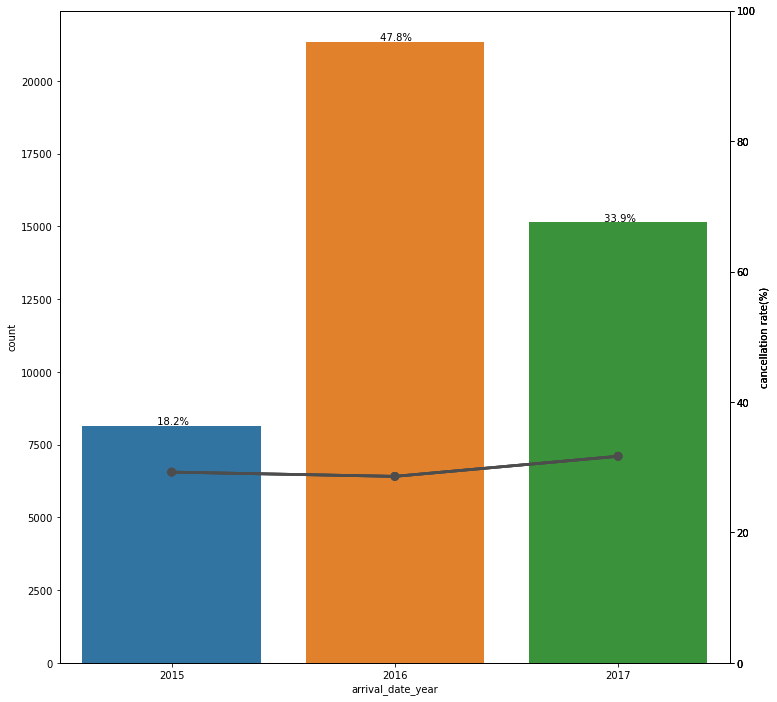

In [25]:
plt.figure(figsize=(12, 12))
ax = sns.countplot(x='arrival_date_year', data=train)

for patch in ax.patches:
    
    ax.text(x = patch.get_x() + patch.get_width()/2,
            y = patch.get_height() + len(train)*0.001,
            s = f'{(patch.get_height()/len(train))*100: 1.1f}%',
            ha = 'center')
    
    ax2 = ax.twinx()
    ax2 = sns.pointplot(x='arrival_date_year', y=1, data=crosstab, color='.3')
    ax2.set_ylabel('cancellation rate(%)')
    ax2.set_ylim(0, 100)

In [26]:
# arrival_date_month
x, y = train['arrival_date_month'], train['is_canceled']

crosstab = pd.crosstab(x, y, normalize='index') * 100
crosstab = crosstab.reset_index()
crosstab

is_canceled,arrival_date_month,0,1
0,April,67.824186,32.175814
1,August,69.476300,30.523700
2,December,72.170761,27.829239
3,February,73.567289,26.432711
4,January,76.800707,23.199293
5,July,70.500849,29.499151
6,June,65.682927,34.317073
7,March,74.007613,25.992387
8,May,66.190037,33.809963
9,November,76.367870,23.632130


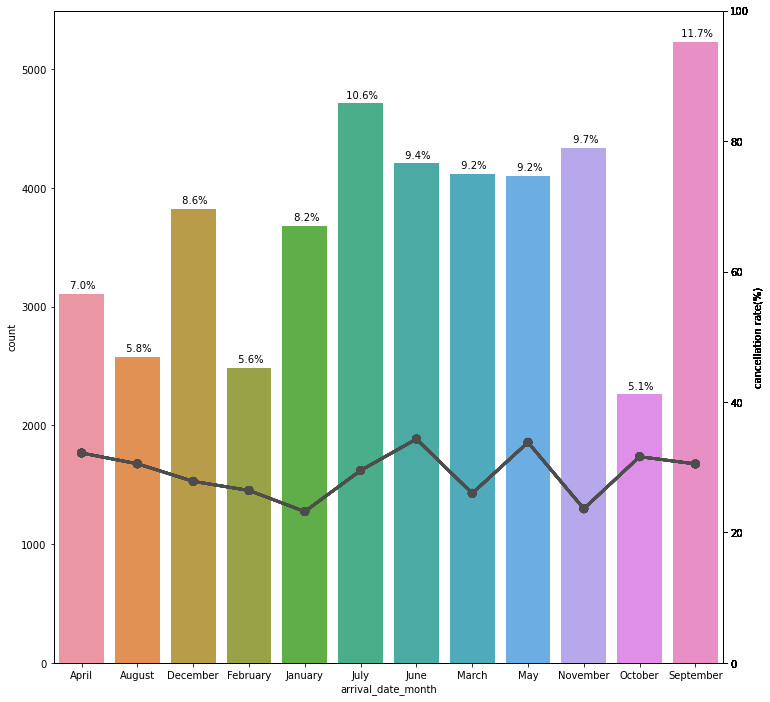

In [27]:
plt.figure(figsize=(12, 12))
ax = sns.countplot(x='arrival_date_month', data=train)

for patch in ax.patches:
    
    ax.text(x = patch.get_x() + patch.get_width()/2,
            y = patch.get_height() + len(train)*0.001,
            s = f'{(patch.get_height()/len(train))*100: 1.1f}%',
            ha = 'center')
    
    ax2 = ax.twinx()
    ax2 = sns.pointplot(x='arrival_date_month', y=1, data=crosstab, color='.3')
    ax2.set_ylabel('cancellation rate(%)')
    ax2.set_ylim(0, 100)

In [28]:
# meal
x, y = train['meal'], train['is_canceled']

crosstab = pd.crosstab(x, y, normalize='index') * 100
crosstab = crosstab.reset_index()
crosstab

is_canceled,meal,0,1
0,BB,70.070300,29.929700
1,FB,48.809524,51.190476
2,HB,72.002190,27.997810
3,SC,69.638435,30.361565
4,Undefined,79.325843,20.674157


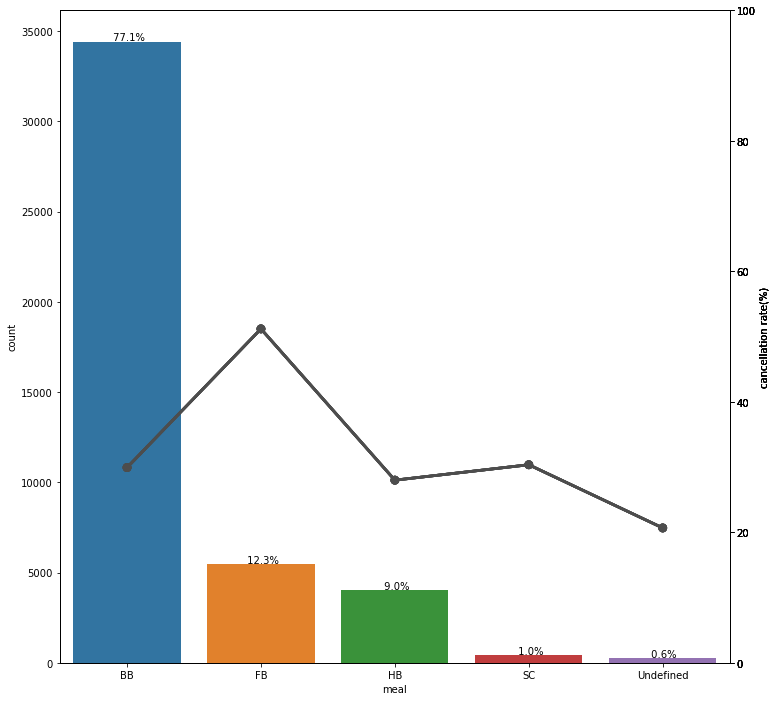

In [29]:
plt.figure(figsize=(12, 12))
ax = sns.countplot(x='meal', data=train)

for patch in ax.patches:
    
    ax.text(x = patch.get_x() + patch.get_width()/2,
            y = patch.get_height() + len(train)*0.001,
            s = f'{(patch.get_height()/len(train))*100: 1.1f}%',
            ha = 'center')
    
    ax2 = ax.twinx()
    ax2 = sns.pointplot(x='meal', y=1, data=crosstab, color='.3')
    ax2.set_ylabel('cancellation rate(%)')
    ax2.set_ylim(0, 100)

In [30]:
# market_segment
x, y = train['market_segment'], train['is_canceled']

crosstab = pd.crosstab(x, y, normalize='index') * 100
crosstab = crosstab.reset_index()
crosstab

is_canceled,market_segment,0,1
0,Aviation,82.142857,17.857143
1,Complementary,93.181818,6.818182
2,Corporate,85.923754,14.076246
3,Direct,87.911418,12.088582
4,Groups,47.655795,52.344205
5,Offline TA/TO,72.911392,27.088608
6,Online TA,70.415006,29.584994


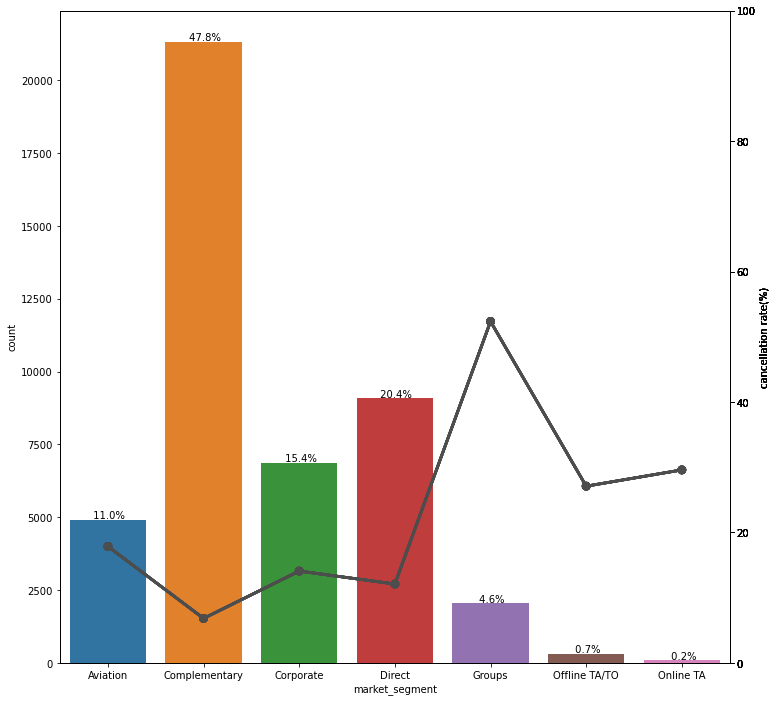

In [31]:
plt.figure(figsize=(12, 12))
ax = sns.countplot(x='market_segment', data=train)

for patch in ax.patches:
    
    ax.text(x = patch.get_x() + patch.get_width()/2,
            y = patch.get_height() + len(train)*0.001,
            s = f'{(patch.get_height()/len(train))*100: 1.1f}%',
            ha = 'center')
    
    ax2 = ax.twinx()
    ax2 = sns.pointplot(x='market_segment', y=1, data=crosstab, color='.3')
    ax2.set_ylabel('cancellation rate(%)')
    ax2.set_ylim(0, 100)

In [32]:
# distribution_channel
x, y = train['distribution_channel'], train['is_canceled']

crosstab = pd.crosstab(x, y, normalize='index') * 100
crosstab = crosstab.reset_index()
crosstab

is_canceled,distribution_channel,0,1
0,Corporate,83.550296,16.449704
1,Direct,86.420832,13.579168
2,GDS,77.108434,22.891566
3,TA/TO,66.744724,33.255276


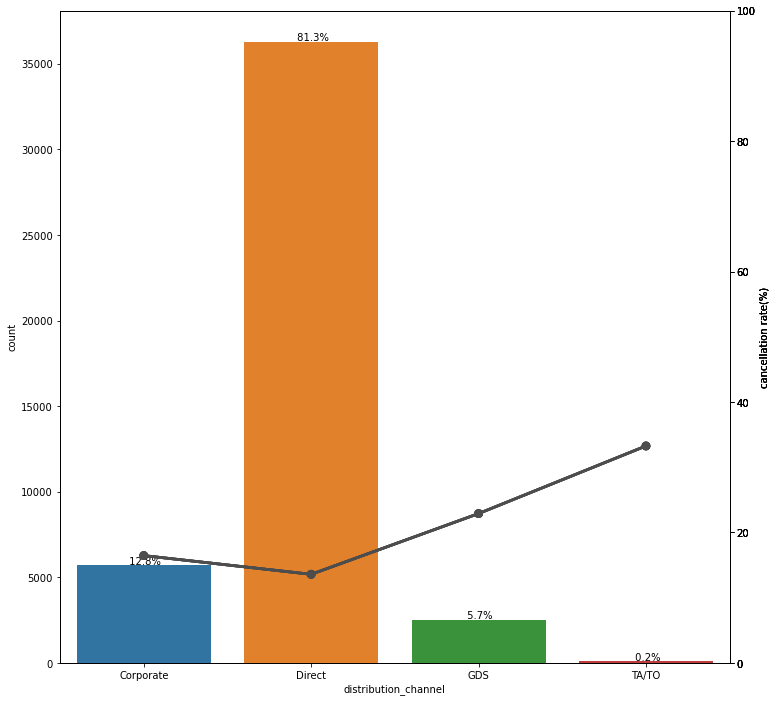

In [33]:
plt.figure(figsize=(12, 12))
ax = sns.countplot(x='distribution_channel', data=train)

for patch in ax.patches:
    
    ax.text(x = patch.get_x() + patch.get_width()/2,
            y = patch.get_height() + len(train)*0.001,
            s = f'{(patch.get_height()/len(train))*100: 1.1f}%',
            ha = 'center')
    
    ax2 = ax.twinx()
    ax2 = sns.pointplot(x='distribution_channel', y=1, data=crosstab, color='.3')
    ax2.set_ylabel('cancellation rate(%)')
    ax2.set_ylim(0, 100)

In [34]:
# reserved_room_type
x, y = train['reserved_room_type'], train['is_canceled']

crosstab = pd.crosstab(x, y, normalize='index') * 100
crosstab = crosstab.reset_index()
crosstab

is_canceled,reserved_room_type,0,1
0,A,68.429633,31.570367
1,B,72.979215,27.020785
2,C,74.929577,25.070423
3,D,75.258293,24.741707
4,E,75.522508,24.477492
5,F,76.524954,23.475046
6,G,69.260204,30.739796
7,H,65.975104,34.024896
8,P,0.000000,100.000000


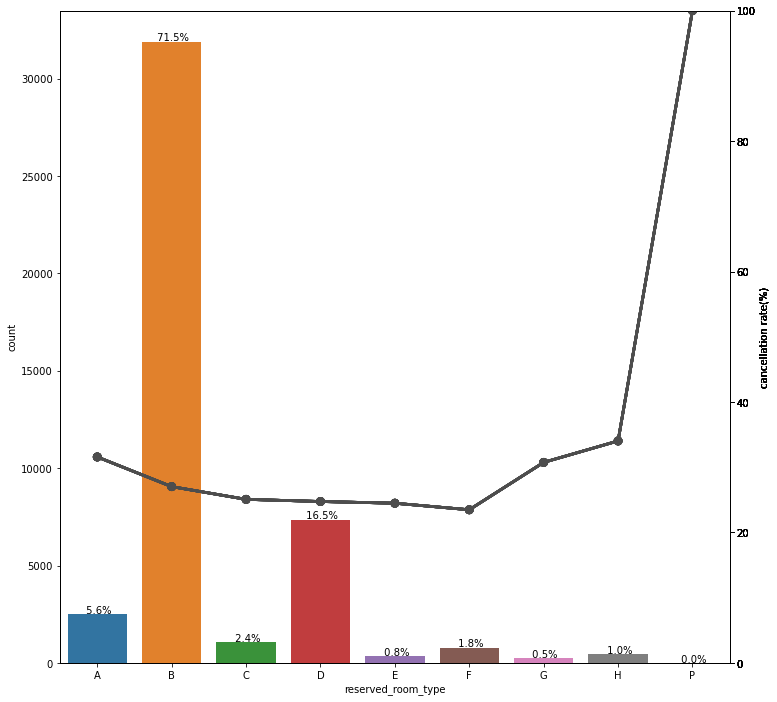

In [35]:
plt.figure(figsize=(12, 12))
ax = sns.countplot(x='reserved_room_type', data=train)

for patch in ax.patches:
    
    ax.text(x = patch.get_x() + patch.get_width()/2,
            y = patch.get_height() + len(train)*0.001,
            s = f'{(patch.get_height()/len(train))*100: 1.1f}%',
            ha = 'center')
    
    ax2 = ax.twinx()
    ax2 = sns.pointplot(x='reserved_room_type', y=1, data=crosstab, color='.3')
    ax2.set_ylabel('cancellation rate(%)')
    ax2.set_ylim(0, 100)

In [36]:
# assigned_room_type
x, y = train['assigned_room_type'], train['is_canceled']

crosstab = pd.crosstab(x, y, normalize='index') * 100
crosstab = crosstab.reset_index()
crosstab

is_canceled,assigned_room_type,0,1
0,A,63.563486,36.436514
1,B,80.401417,19.598583
2,C,85.698570,14.301430
3,D,80.554991,19.445009
4,E,79.516876,20.483124
5,F,81.218638,18.781362
6,G,74.897119,25.102881
7,H,70.877193,29.122807
8,I,99.411765,0.588235
9,K,99.224806,0.775194


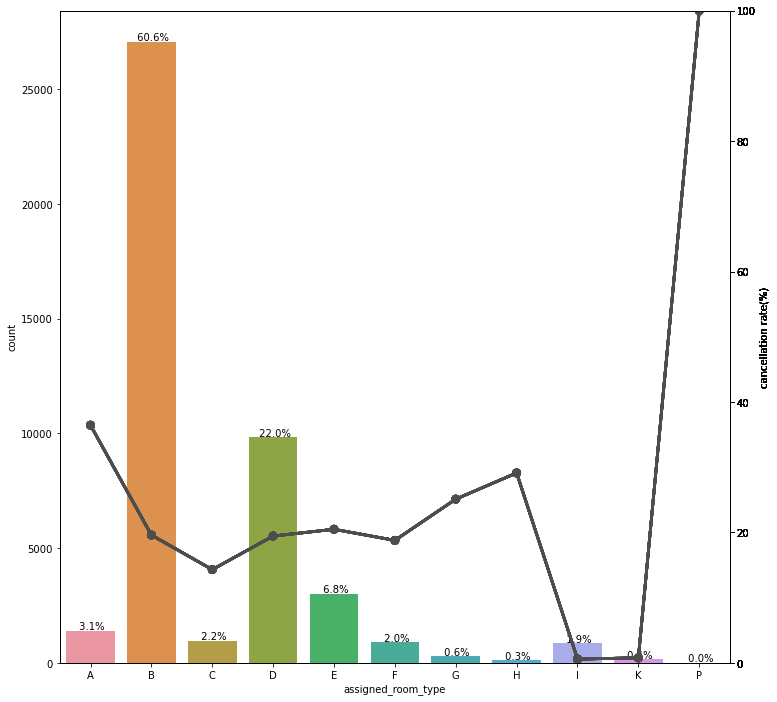

In [37]:
plt.figure(figsize=(12, 12))
ax = sns.countplot(x='assigned_room_type', data=train)

for patch in ax.patches:
    
    ax.text(x = patch.get_x() + patch.get_width()/2,
            y = patch.get_height() + len(train)*0.001,
            s = f'{(patch.get_height()/len(train))*100: 1.1f}%',
            ha = 'center')
    
    ax2 = ax.twinx()
    ax2 = sns.pointplot(x='assigned_room_type', y=1, data=crosstab, color='.3')
    ax2.set_ylabel('cancellation rate(%)')
    ax2.set_ylim(0, 100)

In [38]:
# customer_type
x, y = train['customer_type'], train['is_canceled']

crosstab = pd.crosstab(x, y, normalize='index') * 100
crosstab = crosstab.reset_index()
crosstab

is_canceled,customer_type,0,1
0,Contract,76.725220,23.274780
1,Group,91.949153,8.050847
2,Transient,66.615123,33.384877
3,Transient-Party,80.836556,19.163444


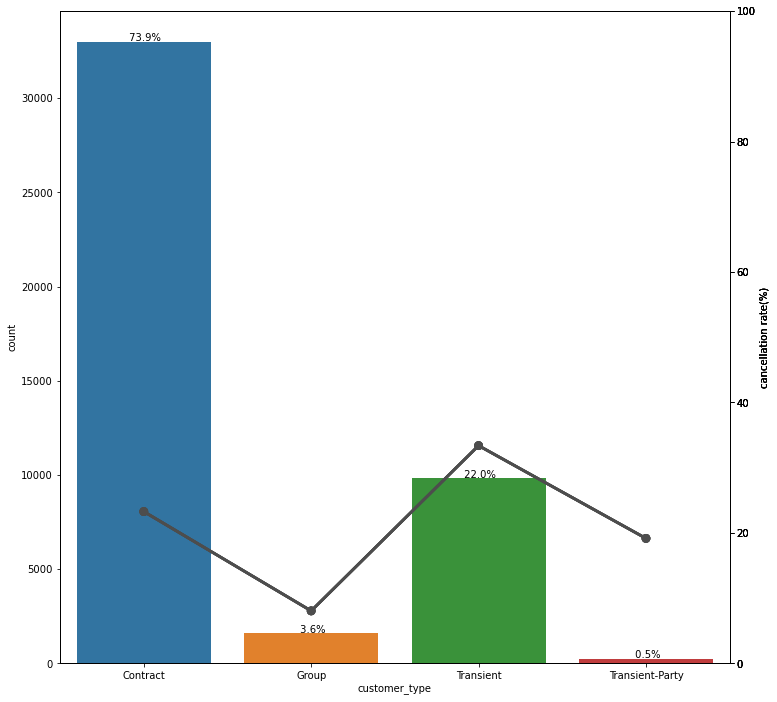

In [39]:
plt.figure(figsize=(12, 12))
ax = sns.countplot(x='customer_type', data=train)

for patch in ax.patches:
    
    ax.text(x = patch.get_x() + patch.get_width()/2,
            y = patch.get_height() + len(train)*0.001,
            s = f'{(patch.get_height()/len(train))*100: 1.1f}%',
            ha = 'center')
    
    ax2 = ax.twinx()
    ax2 = sns.pointplot(x='customer_type', y=1, data=crosstab, color='.3')
    ax2.set_ylabel('cancellation rate(%)')
    ax2.set_ylim(0, 100)